In [1]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

C:\Users\yashs\anaconda3\envs\pyproject\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\yashs\anaconda3\envs\pyproject\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\yashs\anaconda3\envs\pyproject\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [3]:
df_train=pd.read_csv("Dataset/criminal_train.csv")

In [4]:
df_train.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45718 entries, 0 to 45717
Data columns (total 72 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERID      45718 non-null  int64  
 1   IFATHER    45718 non-null  int64  
 2   NRCH17_2   45718 non-null  int64  
 3   IRHHSIZ2   45718 non-null  int64  
 4   IIHHSIZ2   45718 non-null  int64  
 5   IRKI17_2   45718 non-null  int64  
 6   IIKI17_2   45718 non-null  int64  
 7   IRHH65_2   45718 non-null  int64  
 8   IIHH65_2   45718 non-null  int64  
 9   PRXRETRY   45718 non-null  int64  
 10  PRXYDATA   45718 non-null  int64  
 11  MEDICARE   45718 non-null  int64  
 12  CAIDCHIP   45718 non-null  int64  
 13  CHAMPUS    45718 non-null  int64  
 14  PRVHLTIN   45718 non-null  int64  
 15  GRPHLTIN   45718 non-null  int64  
 16  HLTINNOS   45718 non-null  int64  
 17  HLCNOTYR   45718 non-null  int64  
 18  HLCNOTMO   45718 non-null  int64  
 19  HLCLAST    45718 non-null  int64  
 20  HLLOSR

In [6]:
df_train.columns

Index(['PERID', 'IFATHER', 'NRCH17_2', 'IRHHSIZ2', 'IIHHSIZ2', 'IRKI17_2',
       'IIKI17_2', 'IRHH65_2', 'IIHH65_2', 'PRXRETRY', 'PRXYDATA', 'MEDICARE',
       'CAIDCHIP', 'CHAMPUS', 'PRVHLTIN', 'GRPHLTIN', 'HLTINNOS', 'HLCNOTYR',
       'HLCNOTMO', 'HLCLAST', 'HLLOSRSN', 'HLNVCOST', 'HLNVOFFR', 'HLNVREF',
       'HLNVNEED', 'HLNVSOR', 'IRMCDCHP', 'IIMCDCHP', 'IRMEDICR', 'IIMEDICR',
       'IRCHMPUS', 'IICHMPUS', 'IRPRVHLT', 'IIPRVHLT', 'IROTHHLT', 'IIOTHHLT',
       'HLCALLFG', 'HLCALL99', 'ANYHLTI2', 'IRINSUR4', 'IIINSUR4', 'OTHINS',
       'CELLNOTCL', 'CELLWRKNG', 'IRFAMSOC', 'IIFAMSOC', 'IRFAMSSI',
       'IIFAMSSI', 'IRFSTAMP', 'IIFSTAMP', 'IRFAMPMT', 'IIFAMPMT', 'IRFAMSVC',
       'IIFAMSVC', 'IRWELMOS', 'IIWELMOS', 'IRPINC3', 'IRFAMIN3', 'IIPINC3',
       'IIFAMIN3', 'GOVTPROG', 'POVERTY3', 'TOOLONG', 'TROUBUND', 'PDEN10',
       'COUTYP2', 'MAIIN102', 'AIIND102', 'ANALWT_C', 'VESTR', 'VEREP',
       'Criminal'],
      dtype='object')

In [7]:
df_train.dropna(inplace=True)

In [8]:
def getLabelCount(df,target):
    return sorted([( labelValue,len(df.loc[df[target] == labelValue]) ) for labelValue in df[target].unique()])
TARGET = "Criminal"
labelCount = getLabelCount(df_train,TARGET)
labelCount

[(0, 42543), (1, 3175)]

<AxesSubplot:xlabel='Criminal'>

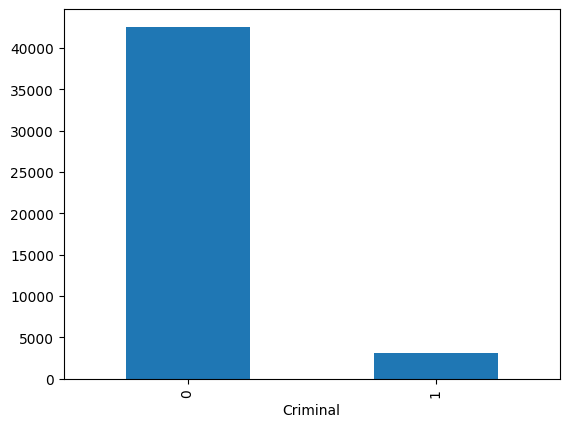

In [9]:
df_train['Criminal'].value_counts().plot(kind='bar')

In [10]:
def convertToFloat(df):
    df1 = df.copy()
    
    for column in df.columns:
        if df[column].dtype == 'int64' and column != 'Criminal':
            df[column] = df[column].astype(float)
    return df

encoded_df = convertToFloat(df_train)

In [11]:
b=df_train
b.to_csv("preprocess.csv")

In [12]:
corrmat = encoded_df.corr()
top_corr_features = corrmat.index

In [13]:
correlationdistance=[0.0005,0.005,0.09,0.5]
#Correlation with output variable
cor_target = abs(encoded_df[top_corr_features].corr()["Criminal"])
for correVal in correlationdistance:
#Selecting highly correlated features
    relevant_features = cor_target[cor_target>correVal]
    print('for ',correVal)
    print(relevant_features)
    print('------------------')

for  0.0005
IFATHER     0.049935
NRCH17_2    0.091212
IRHHSIZ2    0.068281
IIHHSIZ2    0.009238
IRKI17_2    0.039168
              ...   
AIIND102    0.001484
ANALWT_C    0.020863
VESTR       0.002355
VEREP       0.007738
Criminal    1.000000
Name: Criminal, Length: 71, dtype: float64
------------------
for  0.005
IFATHER     0.049935
NRCH17_2    0.091212
IRHHSIZ2    0.068281
IIHHSIZ2    0.009238
IRKI17_2    0.039168
              ...   
PDEN10      0.033048
COUTYP2     0.031587
ANALWT_C    0.020863
VEREP       0.007738
Criminal    1.000000
Name: Criminal, Length: 61, dtype: float64
------------------
for  0.09
NRCH17_2    0.091212
IRHH65_2    0.112589
GRPHLTIN    0.194188
HLTINNOS    0.106967
HLCLAST     0.091338
IRMEDICR    0.144131
IRPRVHLT    0.204797
IIPRVHLT    0.103360
IROTHHLT    0.104196
IIOTHHLT    0.095032
IRFAMSOC    0.110676
IRPINC3     0.128830
IRFAMIN3    0.194889
POVERTY3    0.148304
Criminal    1.000000
Name: Criminal, dtype: float64
------------------
for  0.5
Crimina

In [14]:
# 'NRCH17_2': Number of Children Aged 0-17 in Household
# 'IRHH65_2': Number of Household Members Aged 65 or Older (Interview)
# 'GRPHLTIN': Group Health Plan Coverage
# 'HLTINNOS': Health Insurance Type - Other
# 'HLCLAST': Time Since Last Health Insurance Type Change
# 'IRMEDICR': Medicare (Imputed)
# 'IRPRVHLT': Private Health Insurance (Imputed)
# 'IROTHHLT': Other Health Insurance (Imputed)
# 'IRFAMSOC': Family's Social Class (Interview)
# 'IRPINC3': Family's Poverty Income Ratio (Interview)
# 'POVERTY3': Poverty Level
# 'Criminal': Binary variable indicating criminal activity (assuming based on the name)

In [15]:
selected_col = ['NRCH17_2','IRHH65_2','GRPHLTIN','HLTINNOS','HLCLAST','IRMEDICR',
               'IRPRVHLT','IROTHHLT','IRFAMSOC','IRPINC3','POVERTY3','Criminal']
selected_col

['NRCH17_2',
 'IRHH65_2',
 'GRPHLTIN',
 'HLTINNOS',
 'HLCLAST',
 'IRMEDICR',
 'IRPRVHLT',
 'IROTHHLT',
 'IRFAMSOC',
 'IRPINC3',
 'POVERTY3',
 'Criminal']

In [16]:
encoded_df=encoded_df[selected_col]

In [17]:
encoded_df

,NRCH17_2,IRHH65_2,GRPHLTIN,HLTINNOS,HLCLAST,IRMEDICR,IRPRVHLT,IROTHHLT,IRFAMSOC,IRPINC3,POVERTY3,Criminal
0,2.0,1.0,99.0,99.0,99.0,2.0,2.0,99.0,2.0,1.0,2.0,0
1,1.0,1.0,1.0,99.0,99.0,2.0,1.0,99.0,2.0,1.0,1.0,1
2,1.0,1.0,99.0,99.0,99.0,2.0,2.0,99.0,1.0,2.0,1.0,0
3,0.0,1.0,1.0,99.0,99.0,2.0,1.0,99.0,2.0,7.0,3.0,0
4,0.0,1.0,99.0,99.0,99.0,2.0,2.0,99.0,2.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45713,1.0,1.0,99.0,2.0,5.0,2.0,2.0,2.0,2.0,4.0,2.0,0
45714,0.0,2.0,99.0,99.0,99.0,1.0,2.0,99.0,1.0,2.0,3.0,0
45715,0.0,2.0,99.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0
45716,0.0,1.0,99.0,1.0,99.0,2.0,2.0,1.0,2.0,4.0,3.0,0


In [18]:
to_scale = [col for col in encoded_df.columns if encoded_df[col].max()>1]
scaler = RobustScaler()
scaled =scaler.fit_transform(encoded_df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# replace original columns with scaled columns
for col in scaled:
    encoded_df[col] = scaled[col]

C:\Users\yashs\AppData\Local\Temp\ipykernel_8808\580172998.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df[col] = scaled[col]


In [19]:
to_scale

['NRCH17_2',
 'IRHH65_2',
 'GRPHLTIN',
 'HLTINNOS',
 'HLCLAST',
 'IRMEDICR',
 'IRPRVHLT',
 'IROTHHLT',
 'IRFAMSOC',
 'IRPINC3',
 'POVERTY3']

In [20]:
encoded_df

,NRCH17_2,IRHH65_2,GRPHLTIN,HLTINNOS,HLCLAST,IRMEDICR,IRPRVHLT,IROTHHLT,IRFAMSOC,IRPINC3,POVERTY3,Criminal
0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.333333,-1.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-2.0,1
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.000000,-2.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.666667,0.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.333333,-2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45713,1.0,0.0,1.0,-97.0,-94.0,0.0,1.0,-97.0,0.0,0.666667,-1.0,0
45714,0.0,1.0,1.0,0.0,0.0,-1.0,1.0,0.0,-1.0,0.000000,0.0,0
45715,0.0,1.0,1.0,-97.0,-97.0,0.0,1.0,-97.0,-1.0,0.000000,-1.0,0
45716,0.0,0.0,1.0,-98.0,0.0,0.0,1.0,-98.0,0.0,0.666667,0.0,0


In [21]:
X=encoded_df.drop(['Criminal'], axis=1)
Y=encoded_df['Criminal']
print(X.shape)
print(Y.shape)

(45718, 11)
(45718,)


In [22]:
# sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.25)

In [23]:
print(X_train.shape)
print(X_test.shape)

(34288, 11)
(11430, 11)


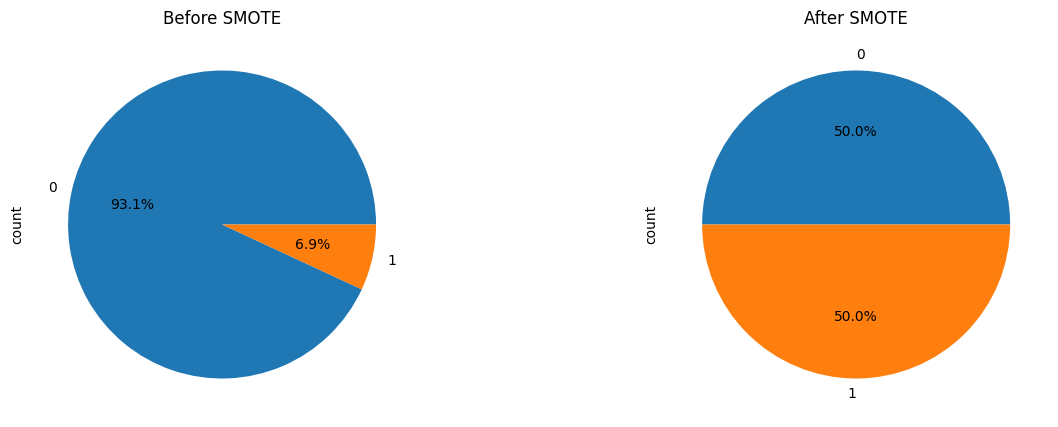

In [24]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train_new, y_train_new = smote.fit_resample(X_train, y_train.values.ravel())
import matplotlib.ticker as mtick

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.pie(autopct='%.1f%%',ax=ax1)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.pie(autopct='%.1f%%',ax=ax2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [25]:
lr =  LogisticRegression()
lr.fit(X_train_new, y_train_new)
y_pred=lr.predict(X_test)

C:\Users\yashs\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Logistic Regression:",metrics.accuracy_score(y_test, y_pred))

Accuracy Logistic Regression: 0.8712160979877516


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report Logistic Regression : \n',matrix)

Confusion matrix : 
 [[ 692  110]
 [1362 9266]]
Outcome values : 
 692 110 1362 9266
Classification report Logistic Regression : 
               precision    recall  f1-score   support

           1       0.34      0.86      0.48       802
           0       0.99      0.87      0.93     10628

    accuracy                           0.87     11430
   macro avg       0.66      0.87      0.71     11430
weighted avg       0.94      0.87      0.90     11430



In [28]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("LogisticRegression:",metrics.accuracy_score(y_test, y_pred))

# Save the trained model to a file using joblib
model_filename1 = "models/Logistic_Regression_Classify_model.joblib"
joblib.dump(lr, model_filename1)
print(f"Model saved as {model_filename1}")

LogisticRegression: 0.8712160979877516
Model saved as models/Logistic_Regression_Classify_model.joblib


In [29]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train_new, y_train_new)  
y_pred4=classifier.predict(X_test)

In [30]:
from sklearn import metrics
print("Accuracy KNN:",metrics.accuracy_score(y_test, y_pred4))

Accuracy KNN: 0.9352580927384077


In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred4

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification KNeighborsClassifier : \n',matrix)

Confusion matrix : 
 [[  361   441]
 [  299 10329]]
Outcome values : 
 361 441 299 10329
Classification KNeighborsClassifier : 
               precision    recall  f1-score   support

           1       0.55      0.45      0.49       802
           0       0.96      0.97      0.97     10628

    accuracy                           0.94     11430
   macro avg       0.75      0.71      0.73     11430
weighted avg       0.93      0.94      0.93     11430



In [32]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("KNeighborsClassifier :",metrics.accuracy_score(y_test, y_pred4))

# Save the trained model to a file using joblib
model_filename1 = "models/KNeighbors_Classifier_Classify_model.joblib"
joblib.dump(classifier, model_filename1)
print(f"Model saved as {model_filename1}")

KNeighborsClassifier : 0.9352580927384077
Model saved as models/KNeighbors_Classifier_Classify_model.joblib


In [33]:
y_pred4[0]

0

In [34]:
# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the model to your training data
clf.fit(X_train_new, y_train_new)

DecisionTreeClassifier()

In [35]:
y_pred1 = clf.predict(X_test)
print("Accuracy DecisionTreeClassifier:",metrics.accuracy_score(y_test, y_pred1))

Accuracy DecisionTreeClassifier: 0.8875765529308837


In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred1

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification DecisionTreeClassifier : \n',matrix)

Confusion matrix : 
 [[ 657  145]
 [1140 9488]]
Outcome values : 
 657 145 1140 9488
Classification DecisionTreeClassifier : 
               precision    recall  f1-score   support

           1       0.37      0.82      0.51       802
           0       0.98      0.89      0.94     10628

    accuracy                           0.89     11430
   macro avg       0.68      0.86      0.72     11430
weighted avg       0.94      0.89      0.91     11430



In [37]:
import joblib
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("DecisionTreeClassifier  :",metrics.accuracy_score(y_test, y_pred1))

# Save the trained model to a file using joblib
model_filename1 = "models/DecisionTree_Classifier_Classify_model.joblib"
joblib.dump(classifier, model_filename1)
print(f"Model saved as {model_filename1}")

DecisionTreeClassifier  : 0.8875765529308837
Model saved as models/DecisionTree_Classifier_Classify_model.joblib


In [38]:
# Create an instance of the DecisionTreeClassifier
random = RandomForestClassifier()

# Fit the model to your training data
random.fit(X_train_new, y_train_new)

RandomForestClassifier()

In [39]:
# Make predictions on the test data
y_pred5 = random.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted =y_pred5

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification SVC : \n',matrix)

Confusion matrix : 
 [[ 660  142]
 [1142 9486]]
Outcome values : 
 660 142 1142 9486
Classification SVC : 
               precision    recall  f1-score   support

           1       0.37      0.82      0.51       802
           0       0.99      0.89      0.94     10628

    accuracy                           0.89     11430
   macro avg       0.68      0.86      0.72     11430
weighted avg       0.94      0.89      0.91     11430



In [41]:
model_filename15 = "models/RandomForestClassifier_Classify_model.joblib"
joblib.dump(random, model_filename15)
print(f"Model saved as {model_filename15}")

Model saved as models/RandomForestClassifier_Classify_model.joblib


In [52]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier

In [54]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),n_estimators=150)
ada.fit(X_train_new, y_train_new)

In [56]:
ada.score(X_test,y_test)
predictions_ada = ada.predict(X_test)
predictions_ada

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [57]:
# actual values
actual = y_test
# predicted values
predicted =predictions_ada

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification AdaBoostClassifier : \n',matrix)

Confusion matrix : 
 [[ 654  148]
 [1137 9491]]
Outcome values : 
 654 148 1137 9491
Classification AdaBoostClassifier : 
               precision    recall  f1-score   support

           1       0.37      0.82      0.50       802
           0       0.98      0.89      0.94     10628

    accuracy                           0.89     11430
   macro avg       0.67      0.85      0.72     11430
weighted avg       0.94      0.89      0.91     11430



In [58]:
model_filename_ada = "models/AdaBoostClassifier_model.joblib"
joblib.dump(random, model_filename_ada)
print(f"Model saved as {model_filename_ada}")

Model saved as models/AdaBoostClassifier_model.joblib


In [64]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [62]:
ETC = ExtraTreesClassifier(n_estimators=100, random_state=0)
ETC.fit(X_train_new, y_train_new)

ExtraTreesClassifier(random_state=0)

In [65]:
ETC_predictions = ETC.predict(X_test)

score_ETC=round(accuracy_score(ETC_predictions,y_test)*100,2)
print("The accuracy score achieved using ExtraTrees Classifier is: "+str(score_ETC)+" %")

The accuracy score achieved using ExtraTrees Classifier is: 88.79 %


In [66]:
# actual values
actual = y_test
# predicted values
predicted =ETC_predictions

# confusion matrix
matrixresult = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrixresult)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification ExtraTreesClassifier : \n',matrix)

Confusion matrix : 
 [[ 656  146]
 [1135 9493]]
Outcome values : 
 656 146 1135 9493
Classification ExtraTreesClassifier : 
               precision    recall  f1-score   support

           1       0.37      0.82      0.51       802
           0       0.98      0.89      0.94     10628

    accuracy                           0.89     11430
   macro avg       0.68      0.86      0.72     11430
weighted avg       0.94      0.89      0.91     11430



In [67]:
model_filename_ETree = "models/ExtraTreesClassifier.joblib"
joblib.dump(random, model_filename_ETree)
print(f"Model saved as {model_filename_ETree}")

Model saved as models/ExtraTreesClassifier.joblib


In [77]:
import tensorflow as tf
from tensorflow import keras
model=tf.keras.Sequential([
    tf.keras.layers.Dense(20,input_shape=X_train_new.shape[1:],activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(22,activation='sigmoid'),
])

In [78]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [79]:
model.fit(X_train_new, y_train_new,epochs=200, batch_size=1024)

Epoch 1/200
63/63 [==============================] - 0s 2ms/step - loss: 2.8481 - accuracy: 0.4684
Epoch 2/200
63/63 [==============================] - 0s 2ms/step - loss: 2.2643 - accuracy: 0.5000
Epoch 3/200
63/63 [==============================] - 0s 2ms/step - loss: 1.3324 - accuracy: 0.5000
Epoch 4/200
63/63 [==============================] - 0s 2ms/step - loss: 0.8362 - accuracy: 0.5000
Epoch 5/200
63/63 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 6/200
63/63 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5000
Epoch 7/200
63/63 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.5000
Epoch 8/200
63/63 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.5000
Epoch 9/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.5000
Epoch 10/200
63/63 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.5000
Epoch 11/

63/63 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.5000
Epoch 84/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.5000
Epoch 85/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.5000
Epoch 86/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.5000
Epoch 87/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.5000
Epoch 88/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.5000
Epoch 89/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.5000
Epoch 90/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.5000
Epoch 91/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.5000
Epoch 92/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.5000
Epoch 93/200


63/63 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.5000
Epoch 165/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.5000
Epoch 166/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.5000
Epoch 167/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.5000
Epoch 168/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.5000
Epoch 169/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4846 - accuracy: 0.5000
Epoch 170/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4846 - accuracy: 0.5000
Epoch 171/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.5000
Epoch 172/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4846 - accuracy: 0.5000
Epoch 173/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4843 - accuracy: 0.5000
Epoc

In [80]:
model.evaluate(X_test,y_test)

358/358 [==============================] - 0s 603us/step - loss: 0.2442 - accuracy: 0.9220


[0.24421384930610657, 0.9220472574234009]

In [83]:
model.save('NN_Criminal.hp5')

INFO:tensorflow:Assets written to: NN_Criminal.hp5\assets
